In [1]:
# Full reset of the camera
!echo 'dlinano' | sudo -S systemctl restart nvargus-daemon && printf '\n'
# Check device number
#!ls -ltrh /dev/video*

In [1]:
import ipywidgets
from jetcam.csi_camera import CSICamera
from IPython.display import display
from jetcam.utils import bgr8_to_jpeg
import os
import dataHelper
import matplotlib.pyplot as plt
%matplotlib inline

camera = CSICamera(width=224, height=224)

[sudo] password for dlinano: 


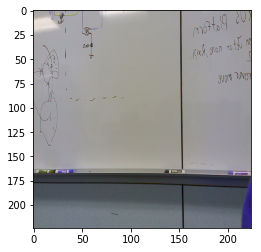

In [4]:
# create inital image for imageWidget
image_widget = ipywidgets.Image(format='jpeg')
image = camera.read()
plt.imshow(image)
plt.imshow(image)
#image_widget.value = bgr8_to_jpeg(image)
#display(image_widget)

# create folder for raw image collection
path = os.getcwd() + '/raw_dataset'
try:
    os.mkdir(path)
except OSError:
    pass
else:
    pass

camera.running = False # sets camera to run continously

datasetSize = 30
dataCount = 0
def update_image(change):
    image = change['new']
    image_widget.value = bgr8_to_jpeg(image)
    

In [3]:
camera.observe(update_image, names='value')

In [7]:
camera.unobserve(update_image, names='value')
camera.running = False

In [ ]:
import cv2
cap = cv2.VideoCapture(0)
ret, frame = cap.read()
cap.release()
print(frame)

In [ ]:
cv2.destroyAllWindows()